#Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [4]:
#Select .json location
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tubes ML"

In [5]:
#command api kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:02<00:00, 61.4MB/s]
100% 163M/163M [00:02<00:00, 71.0MB/s]


In [6]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

#Preprocessing Data

In [89]:
%cd /content/
%mkdir dataset

/content
mkdir: cannot create directory ‘dataset’: File exists


In [90]:
#splitting dataset to 3 dir with 80,10,10 -> train, val, test
data_dir = '/content/data'
output = '/content/dataset'
splitfolders.ratio(data_dir, output=output, seed=42, ratio=(.8, .1, .1)) 
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example

Copying files: 7553 files [00:05, 1331.79 files/s]


In [91]:
# create train, val, test paths
train_dir = os.path.join('/content/dataset/train')
validation_dir = os.path.join('/content/dataset/val')
test_dir= os.path.join('/content/dataset/test')

In [92]:
# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [93]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [94]:
# gather validation data
testX = []
testY = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testY)
testY = np.array(testY)

In [95]:
# check shape of each images in train & val dataset
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)
#print("Test Data=", testX.shape)
#print("Test Label=", testY.shape)

Train Data= (6042, 150, 150, 3)
Train Label= (6042,)
Validation Data= (754, 150, 150, 3)
Validation Label= (754,)


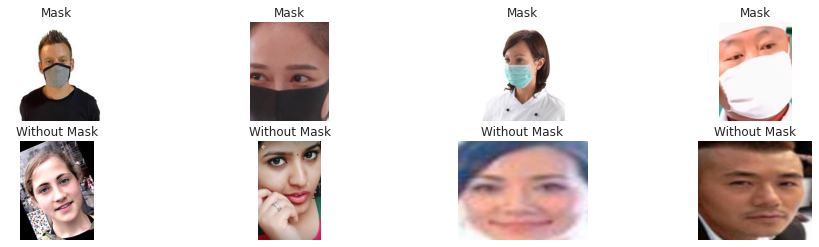

In [96]:
%matplotlib inline


train_mask_dir = os.path.join(train_dir, 'with_mask')
train_nomask_dir = os.path.join(train_dir, 'without_mask')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)
pic_index += 4

next_mask_pix = [os.path.join(train_mask_dir, fname)
                        for fname in os.listdir(train_mask_dir)[pic_index-4:pic_index]]
next_nomask_pix = [os.path.join(train_nomask_dir, fname)
                       for fname in os.listdir(train_nomask_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_mask_pix+next_nomask_pix):
    # Set up subplot; subplot indices start at 1
    if(i < 4) :
        title = "Mask"
    else:
        title = "Without Mask"
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.title(title)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [97]:
# label encoder implementation in each train & validation label
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)
testY = lb.fit_transform(testY)

In [98]:
# check maximum & minimum scale of each images
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))
#print('Test min=%.f, max=%.f' % (testX.min(), testX.max()))

Train min=0, max=255
Validation min=0, max=255


#Augmentation Dataset

In [99]:
# normalize the scale in every images using ImageDataGenerator
datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# implement ImageDataGenerator in train, test data, & each label
train_iterator = datagen.flow(trainX, trainY, batch_size=32)
val_iterator = datagen.flow(valX, valY, batch_size=32)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Batches train=189, validation=24


#Model 1

In [24]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [67]:
#exponanential decay for learning rate schedule
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [68]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/Model3.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [69]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 conv2d_28 (Conv2D)          (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 33, 33, 256)      

In [70]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# training & saving history of every epoch
H = model.fit(train_iterator, epochs=100, 
              batch_size=64, validation_data=val_iterator,
              callbacks=[callbacks, best_model, lr_scheduler]
              )


Epoch 1/100
189/189 [==============================] - ETA: 0s - loss: 0.9295 - accuracy: 0.5703
Epoch 1: val_accuracy improved from -inf to 0.55836, saving model to /content/gdrive/MyDrive/Tubes ML/Model3.h5
189/189 [==============================] - 39s 200ms/step - loss: 0.9295 - accuracy: 0.5703 - val_loss: 0.7404 - val_accuracy: 0.5584 - lr: 0.0100
Epoch 2/100
189/189 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7325
Epoch 2: val_accuracy improved from 0.55836 to 0.56631, saving model to /content/gdrive/MyDrive/Tubes ML/Model3.h5
189/189 [==============================] - 39s 204ms/step - loss: 0.5614 - accuracy: 0.7325 - val_loss: 1.3241 - val_accuracy: 0.5663 - lr: 0.0089
Epoch 3/100
189/189 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.8021
Epoch 3: val_accuracy improved from 0.56631 to 0.69894, saving model to /content/gdrive/MyDrive/Tubes ML/Model3.h5
189/189 [==============================] - 39s 204ms/step - loss: 0.4566 

#Evaluasi Model 1

In [71]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(H.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.929479,0.570341,0.740383,0.558355,1.000000e-02
1,0.561387,0.732539,1.324080,0.566313,8.912509e-03
2,0.456628,0.802052,0.543037,0.698939,7.943282e-03
3,0.432649,0.819265,1.719769,0.652520,7.079458e-03
4,0.385776,0.845746,0.484830,0.733422,6.309574e-03
...,...,...,...,...,...
82,0.257894,0.901192,0.220262,0.920424,7.943282e-07
83,0.251571,0.900364,0.204702,0.927056,7.079458e-07
84,0.261282,0.898212,0.227018,0.913793,6.309573e-07
85,0.269413,0.891592,0.211927,0.928382,5.623413e-07


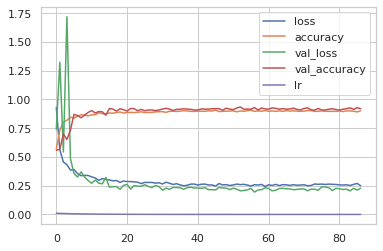

In [72]:
history_df.plot();

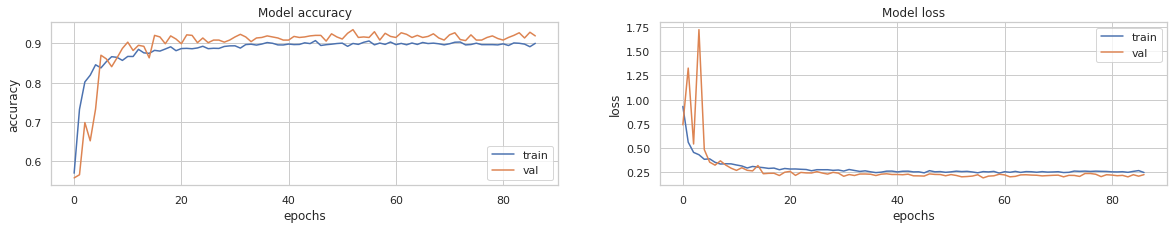

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [74]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [76]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Tubes ML/Model3.h5'
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.4808454425363276
Precision : 0.4499312165925348
f1Score : 0.36400922121948176
[[342  31]
 [362  22]]


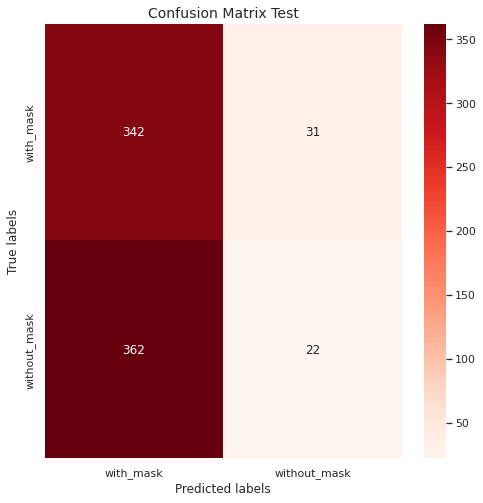

In [77]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= 'binary',
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

#Model 2

In [100]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [101]:
#exponanential decay for learning rate schedule
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [102]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/Model4Categorical.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [103]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 conv2d_43 (Conv2D)          (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 33, 33, 256)      

In [104]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# training & saving history of every epoch
H = model.fit(train_iterator, epochs=100, 
              batch_size=64, validation_data=val_iterator,
              callbacks=[callbacks, best_model, lr_scheduler]
              )


Epoch 1/100


ValueError: ignored

#Evaluasi Model 2

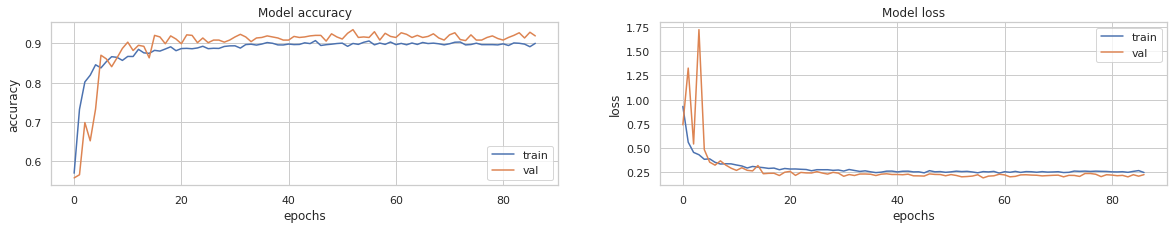

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = tagetdir
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.48348745046235136
Precision : 0.3326528161402666
f1Score : 0.32570049440106125
[[364   9]
 [382   2]]


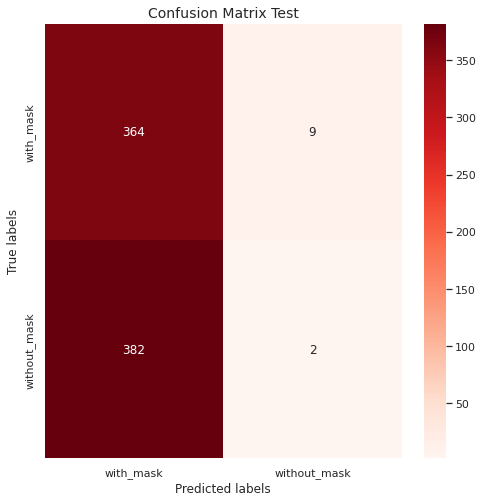

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()